In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import numpy as np
import networkqit as nq
import networkx as nx
from numpy.random import random as rand
from networkqit import graph_laplacian as GL
from scipy.linalg import eigvalsh
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
l = []
for i in range(0,100):
    G = nx.planted_partition_graph(4,50,1,0.01)
    A = nx.to_numpy_array(G)
    L = nq.graph_laplacian(A)
    l.append(eigvalsh(L))
l = np.array(l).flatten()
plt.hist(l,100)
plt.show()

In [ ]:
K=6
cmap = sns.color_palette('viridis',K)
l=l[0:100]
fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(36,12))
for i,beta in enumerate(np.logspace(-3,0,K)):
    k,p = np.unravel_index(i,ax.shape)
    y = np.exp(-beta*l)/np.sum(np.exp(-beta*l))
    #ax[k,p].hist(y,200,color=cmap[i])
    ax[k,p].stem(sorted(y,reverse=True))
    ax[k,p].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    #ax[k,p].axis('off')
    ax[k,p].set_title('$\\beta=$%.2g' % (beta))
    #ax[k,l].set_xscale('log')
    #ax[k,l].set_yscale('log')
#plt.savefig('plot_eig_rho_beta_stem2.svg')

0.09827655310621243
0.09827655310621243
0.09962324649298597


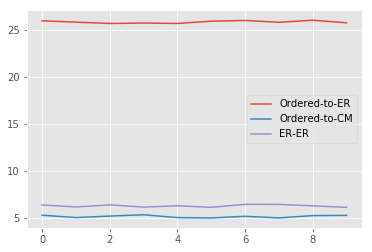

In [15]:
G = nq.ring_of_cliques(10,50)
Astar = nx.to_numpy_array(G)
k = Astar.sum(axis=0).astype(int)
Lstar = nq.graph_laplacian(Astar)
pstar = nx.density(G)
N = len(G.nodes())
print(pstar)
alldkl =  []
alldeltaU = []
alldeltaF = []
for i in range(0,10):
    Ger = nx.erdos_renyi_graph(N,pstar)
    Aer = nx.to_numpy_array(Ger)
    Ler = nq.graph_laplacian(Aer)
    X = nq.SpectralDivergence(Lobs=Lstar,Lmodel=Ler,beta=0.1)
    alldeltaU.append(X.Em - X.Eo)
    alldeltaF.append(X.Fm - X.Fo)
    alldkl.append(X.rel_entropy)

alldeltaF = np.array(alldeltaF)
alldeltaU = np.array(alldeltaU)
plt.plot(alldeltaU-alldeltaF)

# More random (configuration model)
G = nx.configuration_model(k)
Astar = nx.to_numpy_array(G)
k = Astar.sum(axis=0)
Lstar = nq.graph_laplacian(Astar)
pstar = nx.density(G)
print(pstar)
alldkl =  []
alldeltaU = []
alldeltaF = []
for i in range(0,10):
    Ger = nx.erdos_renyi_graph(N,pstar)
    Aer = nx.to_numpy_array(Ger)
    Ler = nq.graph_laplacian(Aer)
    X = nq.SpectralDivergence(Lobs=Lstar,Lmodel=Ler,beta=0.1)
    alldeltaU.append(X.Em - X.Eo)
    alldeltaF.append(X.Fm - X.Fo)
    alldkl.append(X.rel_entropy)

alldeltaF = np.array(alldeltaF)
alldeltaU = np.array(alldeltaU)
plt.plot(alldeltaU-alldeltaF)

# More random Erdos-Renyi
G = nx.erdos_renyi_graph(N,pstar)
Astar = nx.to_numpy_array(G)
k = Astar.sum(axis=0)
Lstar = nq.graph_laplacian(Astar)
pstar = nx.density(G)
print(pstar)
alldkl =  []
alldeltaU = []
alldeltaF = []
for i in range(0,10):
    Ger = nx.erdos_renyi_graph(N,pstar)
    Aer = nx.to_numpy_array(Ger)
    Ler = nq.graph_laplacian(Aer)
    X = nq.SpectralDivergence(Lobs=Lstar,Lmodel=Ler,beta=0.1)
    alldeltaU.append(X.Em - X.Eo)
    alldeltaF.append(X.Fm - X.Fo)
    alldkl.append(X.rel_entropy)

alldeltaF = np.array(alldeltaF)
alldeltaU = np.array(alldeltaU)
plt.plot(alldeltaU-alldeltaF)
plt.legend(['Ordered-to-ER','Ordered-to-CM','ER-ER'])
#plt.plot(alldeltaF)

0.49758793969849247


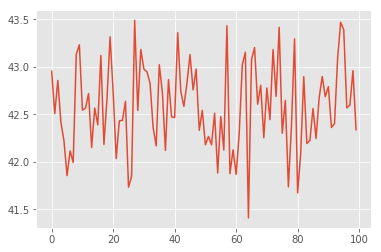

In [17]:
G = nq.ring_of_cliques(2,100)
Astar = nx.to_numpy_array(G)
Lstar = nq.graph_laplacian(Astar)
pstar = nx.density(G)
N = len(G.nodes())
print(pstar)
alldkl =  []
alldeltaU = []
alldeltaF = []
for i in range(0,100):
    Ger = nx.erdos_renyi_graph(N,pstar)
    Aer = nx.to_numpy_array(Ger)
    Ler = nq.graph_laplacian(Aer)
    X = nq.SpectralDivergence(Lobs=Lstar,Lmodel=Ler,beta=0.1)
    alldeltaU.append(X.Em - X.Eo)
    alldeltaF.append(X.Fm - X.Fo)
    alldkl.append(X.rel_entropy)

alldeltaF = np.array(alldeltaF)
alldeltaU = np.array(alldeltaU)
plt.plot(alldeltaU-alldeltaF)
